6. Using KNN algorithm, predict which category a customer belongs to on the basis of the data provided by a telecommunications firm. Find the accuracy of the KNN algorithm in predicting the category of a customer.

Dataset: teleCust.csv

In [3]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data
data = pd.read_csv('teleCust.csv')
X = data.drop('custcat', axis=1)
y = data['custcat']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# taking k as user input 
n=int(input("Enter the number of neighbors (k): "))

# Create and train KNN model
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train)

# Evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")

KNN Accuracy: 0.3250


KNN Accuracy: 0.3350


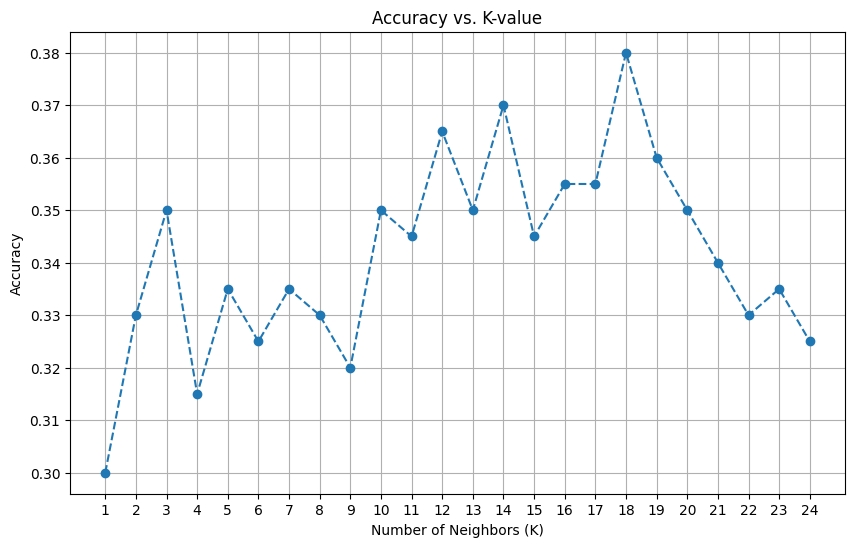

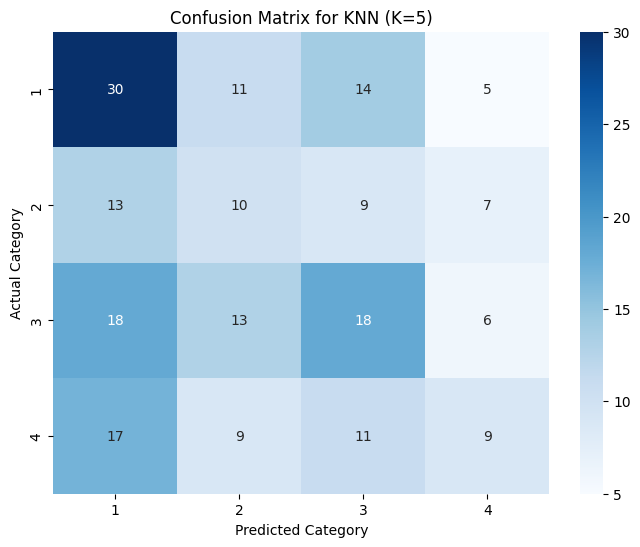

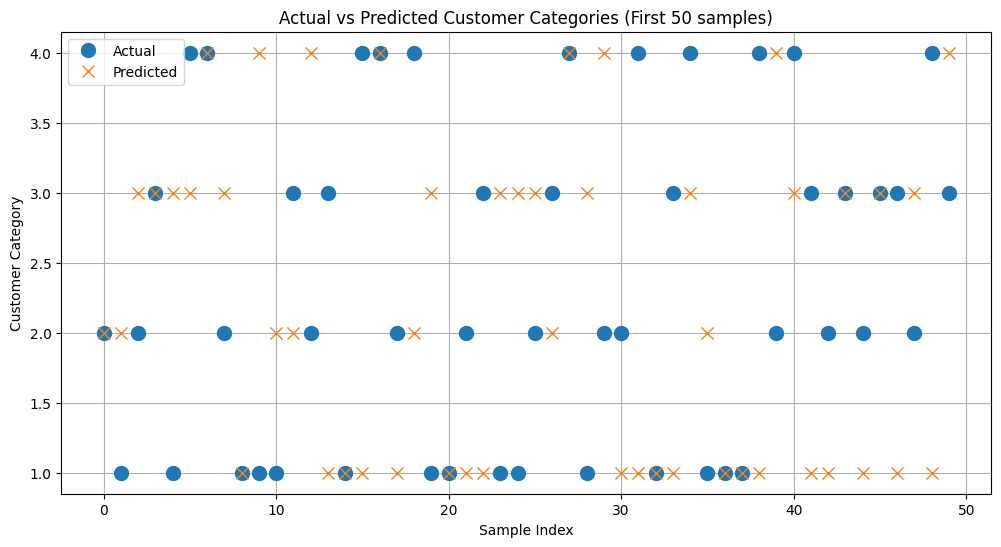

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
data = pd.read_csv('teleCust.csv')
X = data.drop('custcat', axis=1)
y = data['custcat']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")

# Visualization 1: Accuracy vs. K-value (Elbow Curve)
k_values = range(1, 25)
accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_temp))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed')
plt.title('Accuracy vs. K-value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Visualization 2: Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Confusion Matrix for KNN (K=5)')
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.show()

# Visualization 3: Actual vs Predicted (sample of 50 points)
plt.figure(figsize=(12, 6))
sample_size = 50
plt.plot(y_test.values[:sample_size], 'o', label='Actual', markersize=10)
plt.plot(y_pred[:sample_size], 'x', label='Predicted', markersize=8)
plt.title(f'Actual vs Predicted Customer Categories (First {sample_size} samples)')
plt.xlabel('Sample Index')
plt.ylabel('Customer Category')
plt.legend()
plt.grid(True)
plt.show()